<a href="https://colab.research.google.com/github/hsarma/dm_g42_a1/blob/main/DM_Group42_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Mining - Group 42 - Assignment 1
## Credit Cards Clients Data Set 

- PAVAN CHALLA - 2020MT12261
- K HARIHARA PRASAD SARMA - 2020MT12184
- ABHIRAJ ANAND - 2020MT12283

# Introduction
Data mining is the process of working with large data sets to identify patterns and establish relationships to solve problems through data analysis. As a part of the assignment, you will be learning to design and implement the complete DM processing pipeline and gain an understanding how to perform preprocessing to analysis to draw insights for a given dataset._Credit_Card to improve basic skills of data cleaning, data analysis, data visualization and machine learning. It is primarily intended to help myself understanding what to do and how. Any feedback is welcome.

Different tasks involved in the assignment
--
1. Dataset Selection

    Selected Dataset - https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

    Once you decide the dataset, you would need to study and understand the dataset in detail and identify the key questions or insights that you would like to draw from the dataset.


2. Data Preprocessing and Visualization

    You would need to perform exploratory data analysis along with suitable visualizations and identify/employ different preprocessing techniques suitable for the dataset. You should implement appropriate data preprocessing techniques studied in the class in addition to any data cleaning (if required) and show the results.


3. Data Analysis

    Based on the insights that you wish to draw from the dataset, you would need to identify the key DM tasks like association analysis, clustering, classification of outlier analysis that are applicable for the dataset. You should implement atleast 3 data analysis


## Features/Variables
There are 25 Features or variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)

## Key Questions and Insights from Data sets

1. How well can we month by month predict the default of the set of clients? 
2. Can I predict default a month in advance?
3. How does the probability of default payment vary by categories of different demographic variables?
4. Which variables are the strongest predictors of default payment?

The notebook is structured broadly as follows:

* Data Preprocessing and Visualization
    * Data exploration: just to see what we have.
    * Data Cleaning: time to make choices about undocumented labels
    * Feature engineering: time to be creative in order to select relevant features
* Data Analysis

In [26]:
# Import basic libraries
import requests, io # to load data set from a URL
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#from ggplot import *
%matplotlib inline

In [27]:

DATA_DOWNLOAD_URL='https://raw.githubusercontent.com/hsarma/dm_g42_a1/main/UCI_Credit_Card.csv'

r = requests.get(DATA_DOWNLOAD_URL)
df = pd.read_csv(io.BytesIO(r.content))

df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
25746,25747,160000.0,2,2,1,41,1,-1,-1,-1,-1,-1,0.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,1496.0,0
19889,19890,310000.0,2,3,1,35,0,0,0,0,0,0,83719.0,81138.0,87523.0,77902.0,82165.0,97298.0,5000.0,18088.0,5500.0,6300.0,17300.0,25500.0,0
13236,13237,70000.0,2,1,2,23,0,0,0,0,0,0,8878.0,10077.0,11203.0,11320.0,11487.0,11895.0,1500.0,1600.0,600.0,500.0,600.0,2600.0,0
10521,10522,100000.0,1,2,1,51,3,4,3,2,2,2,56002.0,55557.0,54083.0,54601.0,55585.0,57027.0,1000.0,0.0,2000.0,2000.0,2500.0,0.0,1
23452,23453,280000.0,2,2,1,34,-2,-2,-2,-2,-2,-2,9103.0,6419.0,11966.0,5844.0,8994.0,14631.0,6439.0,12042.0,5844.0,4672.0,14724.0,4429.0,0


Let's find out if there are missing or anomalous data

In [30]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

Above clearly suggests that this data set does not have any missing values.

In [31]:
# Categorical variables description
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


No missing data, but a few anomalous things:
* EDUCATION has category 5 and 6 that are unlabelled. Also, category 0 is undocumented.
* MARRIAGE has a label 0 that is undocumented

In [32]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


All the above have an undocumented label -2. As provided 1,2,3, etc are the months of delay so we can consider 0 to be labeled as 'pay duly' and every negative value should be seen as a 0. We can revisit this later.

In [33]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


Can the negative values be interpreted as credit? This needs to be investigated.

In [34]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

The range is very broad, Investigation required.


Lets make some label modification to two of features/variables. Updating PAY_0 to PAY_1 and default.payment.next.month to DEF_PAY

In [35]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


It is good idea to have some general idea of default probability. Lets calculate date.

In [ ]:
df.def_pay.sum() / len(df.def_pay)

0.2212

Visualize the dataset using any two appropriate graphs

we will be looking at the distribution of classes( Default payment (1=yes, 0=no)) in our dataset

In [ ]:
count = df.def_pay.value_counts()
count

0    23364
1     6636
Name: def_pay, dtype: int64

KeyboardInterrupt: ignored

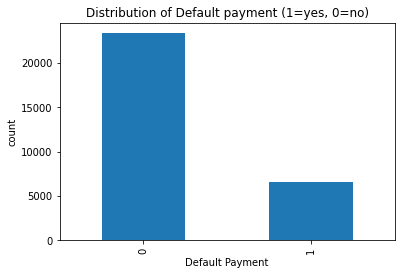

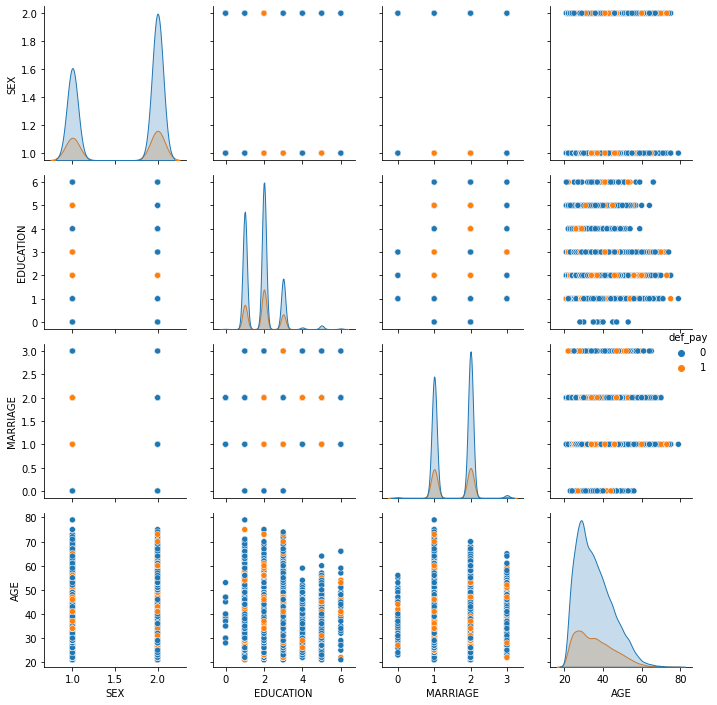

In [ ]:
count.plot(kind='bar') ## Plot bar chart to visualize distribution of classes
plt.title("Distribution of Default payment (1=yes, 0=no)")
plt.xlabel("Default Payment")
plt.ylabel("count");
sns.pairplot(df, hue='def_pay', vars=['SEX', 'EDUCATION', 'MARRIAGE', 'AGE']) ## Plot pairwise relationships in a dataset
plt.show()

---
### Target variable/ class
The main motive of our predictor is to correctly predict on the basis of the data available, if the credit card payment is 
- Defaulted(1)
- Not Defaulted(0)

Hence, our target class is **def_pay**

In [ ]:
y_target = df['def_pay']

### Feature Selection

Now, among all the features available, we need to select the best set of features inorder to train our predictor. Feature selection plays an important role in the accuracy of the prediction.

Let's see what features are available on our dataset.

**Let us now plot out the pairplot of different features to determine which features are better at classifying the 2 classes of our problem.**

In [ ]:
df['target'] = df['def_pay'].map({0:'Not Defaulted',1:'Defaulted'}) # converting the data into categorical

In [ ]:
g = sns.pairplot(df.drop('DEF_PAY', axis = 1), hue="target", palette='prism');

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fc313422290> (for post_execute):


KeyboardInterrupt: ignored

# Data Cleaning

As seen previously, some categories are mislabeled or undocumented. Before proceeding, it is time to fix it.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3). 

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Let us draw histograms to gauge the distribution, finding if they make sense, presence of any outliers etc.

In [ ]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

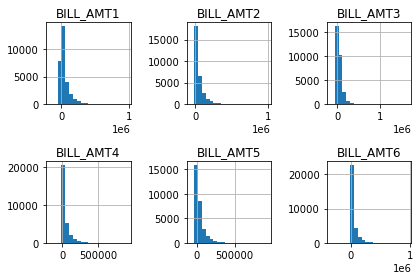

In [ ]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

As per data set definition, the PAY_n variables indicate the number of months of delay and indicates "pay duly" with -1. Question then arises as what -2 and 0 stand for? We can conclude that label needs to be adjusted to 0 for "pay duly".

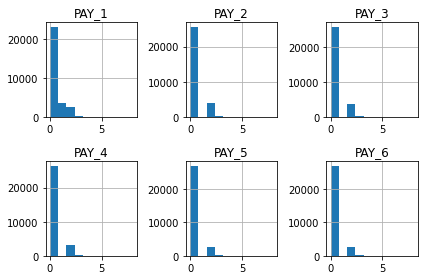

In [ ]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

Next, I am puzzled by how wide is the range of possible values in the features regarding money, so let's see, for example the PAY_AMT1 that are anomalous.

In [ ]:
df[df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]
# doesn't look weird after all

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [ ]:
df[df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_2', 'PAY_3', 'BILL_AMT3', 
                          'PAY_AMT2', 'BILL_AMT2', 'def_pay']]
# doesn't look weird after all

,LIMIT_BAL,PAY_2,PAY_3,BILL_AMT3,PAY_AMT2,BILL_AMT2,def_pay
2592,480000.0,0,0,339176.0,344261.0,38929.0,0
3774,500000.0,0,0,301441.0,302961.0,39356.0,0
5296,500000.0,0,0,1664089.0,1684259.0,-18088.0,0
5400,500000.0,0,0,385228.0,385228.0,8970.0,0
6150,300000.0,0,0,4735.0,344467.0,-5973.0,1
6864,500000.0,0,0,444462.0,300018.0,201402.0,0
9044,500000.0,0,0,384973.0,384986.0,24201.0,0
11568,430000.0,0,0,354716.0,358689.0,960.0,1
11853,360000.0,1,0,338600.0,361560.0,-22960.0,0
12829,340000.0,0,0,330510.0,312723.0,335584.0,1


A quick check on all the others reveal that they are not outliers but simply clients with a lot of money.

However, I will keep this in mind in case of algorithms sensible to scales.

## Further analysis

Now that I have fixed what looked strange, I can look at the correlations with the target variable.

The goal is to see how relevant each feature is, what is its meaning, if it can be used to create new features, and, as usual, play a bit with other basic techniques.

In [ ]:
df.groupby(['SEX', 'def_pay']).size()

SEX  def_pay
1    0           9015
     1           2873
2    0          14349
     1           3763
dtype: int64

Well, this doesn't look very good, why don't we create a dataframe out of it?

In [ ]:
# Using crosstab
pd.crosstab(df.SEX, df.def_pay)

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


We can do two things: plot directly or compute the probability for each gender to default according to our dataset

In [ ]:
gender.plot(kind='bar', stacked = True)

NameError: ignored

In [ ]:
gender['perc'] = (gender[1]/(gender[0] + gender[1])) 
#this creates a new column in our dataset
gender

NameError: ignored

Considering that about 22% of the customers will default, we see a couple of things:

there are significantly more women than men
men are most likely going to default the next month
However, we don't have to jump to any conclusion just yet since there might be some lurking variable that justifies the data better (and, being SEX the first variable we look at, it is most likely the case). However, nice result and move on.

In [ ]:
def corr_2_cols(Col1, Col2):
    res = df.groupby([Col1, Col2]).size().unstack()
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [ ]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school. However, numerically they will not have much weight in the final result.
Let's see with MARRIAGE.

In [ ]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


Here it seems that married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)

All considered, these three categories seem to affect the result we want to predict. Thus we keep them in mind for later.

I try to explain these first results and, while I can imagine how marital status or education can determine the balance of your credit card, I can't find a way of explaining why the type of genitals can do that as well. This particular result could probably get more meaning when put in the context of the society this people belong to.

Revealing gender inequalities in not our priority (at least not on a beginner notebook on Kaggle), so we move on.

In [ ]:
corr_2_cols('MARRIAGE', 'SEX')
corr_2_cols('EDUCATION', 'SEX')

SEX,1,2,perc
EDUCATION,,,
1,4354,6231,0.588663
2,5374,8656,0.616964
3,1990,2927,0.595282
4,170,298,0.636752


Now I want to see if my suspects on the payments and the bills have some foundation

In [ ]:
df[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'def_pay']].sample(30)
df[df.def_pay == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(30)

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_1,LIMIT_BAL
29114,0.0,0.0,0.0,0,300000.0
8190,149482.0,0.0,153364.0,1,190000.0
2488,112130.0,5332.0,110327.0,2,110000.0
16223,29461.0,1800.0,28133.0,2,50000.0
27721,291.0,291.0,291.0,0,150000.0
2947,101123.0,0.0,104489.0,3,100000.0
17775,87851.0,3500.0,86654.0,2,100000.0
15691,7386.0,1121.0,6376.0,0,10000.0
10447,1312.0,1312.0,581.0,2,30000.0
10729,102650.0,4700.0,156197.0,0,160000.0


To me it seems that it goes like that:
* I have a BILL of X, I pay Y
* The month after I have to pay X-Y + X', being X' my new expenses, I pay Y'
* The month after I have to pay X+X' - Y - Y' + X'' , I pay Y''
* So on so forth

On top of that I may or may not have months of delay.

It seems that if by september I have a bill too close to my limit, I generally fail. However, I can already see some dramatic exceptions.

Moreover, I can spot some clients that joined our dataset at a later month: they have 0 in BILL and PAY AMT for a while and then they start. I have to keep that in mind as well.

Now I want to see how the month of delay gets assigned. To this end, I will consider only people with no delays 6 months ago and see how their payments go.

In [ ]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']].sample(20)
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0) & (df.PAY_AMT5 == 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]

,BILL_AMT6,PAY_AMT5,BILL_AMT5,PAY_5
2272,244.0,0.0,244.0,2
13895,950.0,0.0,1340.0,2
18795,20000.0,0.0,20000.0,2
19933,2240.0,0.0,2825.0,2
20737,18767.0,0.0,18767.0,2
22212,702.0,0.0,802.0,2
22691,249.0,0.0,27231.0,2
23887,25000.0,0.0,26000.0,2
27196,1170.0,0.0,1573.0,2


I am puzzled by a few things:

why there is no PAY_5 at 1 but only at 2? This is the first month the client doesn't pay (or doesn't pay enough)
Sometimes the client did pay but still got a delay value bigger than 0

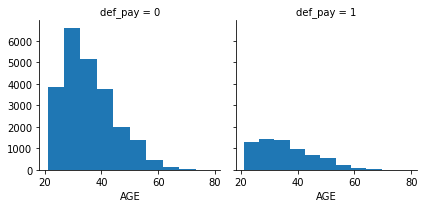

In [ ]:
fil = ((df.PAY_AMT1 > df.BILL_AMT2) & (df.PAY_1 > 0) & (df.PAY_2 == 0))
df[fil][['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_1', 'LIMIT_BAL', 'def_pay']].head(15)
g = sns.FacetGrid(df, col = 'def_pay')
g.map(plt.hist, 'AGE')

This throws me off. There are clients that paid more there were asked to, had even a negative bill in Sept., and still have a month of delay, and even defaulted the next month. I am incline of not considering the variables PAY_n for my models because I can't give sense to them (even though it seems they can play a big role). I can transform them into a binary variable (late/notlate) because that is something I can understand.

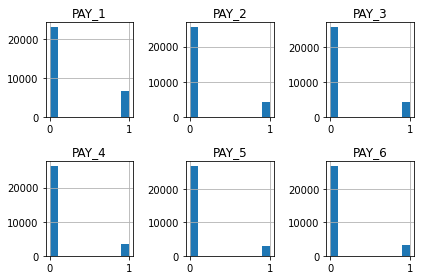

In [ ]:
df.loc[df.PAY_1 > 0, 'PAY_1'] = 1
df.loc[df.PAY_2 > 0, 'PAY_2'] = 1
df.loc[df.PAY_3 > 0, 'PAY_3'] = 1
df.loc[df.PAY_4 > 0, 'PAY_4'] = 1
df.loc[df.PAY_5 > 0, 'PAY_5'] = 1
df.loc[df.PAY_6 > 0, 'PAY_6'] = 1
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

# Feature Engineering

I saw that men are most likely to default and also that married people are most likely to default. Thus why not combine them in a single variable given by the product of the two? I chose these two first because they are both labeled 1,2 and they both decrease the probability of defaulting if their value increase. According to our models, SEX and MARRIAGE are the least important variables, so it can be a good exercise to see if combining them is a waste of time.

This operation will create a category for married man, which I expect to be the one with high probability of defaulting, a combination of married women and single man, a category (expected to be numerically less populated) of "divorced" men (in other words, the "other" in marriage times the "male" in sex), one for single women and one for "divorced" women.

In [ ]:
df['SE_MA'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA', 'def_pay')

def_pay,0,1,perc
SE_MA,,,
0,23364,6636,0.2212


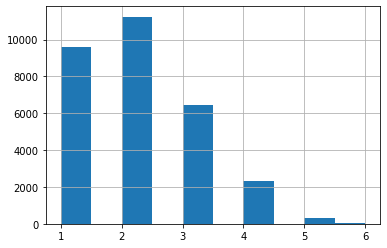

In [ ]:
bins = [20, 29, 39, 49, 59, 69, 81]
bins_names = [1, 2, 3, 4, 5, 6]
df['AgeBin'] = pd.cut(df['AGE'], bins, labels=bins_names)
df.AgeBin.hist()


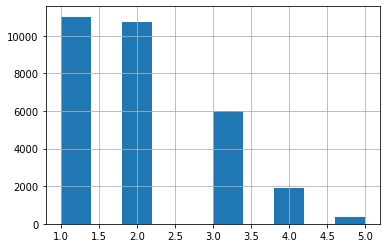

In [ ]:
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [ ]:
corr_2_cols('AgeBin', 'def_pay')
corr_2_cols('AgeBin', 'SEX')

SEX,1,2,perc
AgeBin,,,
1,3842,7171,0.651140
2,4363,6350,0.592738
3,2587,3418,0.569192
4,917,1013,0.524870
5,179,160,0.471976


I see that default probability goes down in your 30's and then goes higher and higher. At the same time, the percentage of men is growing with the age category. Thus I want to combine the two as before and create a combination of the two.

In [ ]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay,0,1,perc
SE_AG,,,
1,2929,913,0.237637
2,3350,1013,0.232180
3,1939,648,0.250483
4,666,251,0.273719
5,131,48,0.268156
6,5613,1558,0.217264
7,5174,1176,0.185197
8,2667,751,0.219719
9,783,230,0.227048


Now it is time to do something that indicates being a client at a given month or not. I would say that if PAY, BILL_AMT and PAY_AMT are 0, then we are not talking about a client

In [ ]:
df['Client_6'] = 1
df['Client_5'] = 1
df['Client_4'] = 1
df['Client_3'] = 1
df['Client_2'] = 1
df['Client_1'] = 1
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)) , 'Client_6'] = 0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)) , 'Client_5'] = 0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)) , 'Client_4'] = 0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)) , 'Client_3'] = 0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)) , 'Client_2'] = 0
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)) , 'Client_1'] = 0
pd.Series([df[df.Client_6 == 1].def_pay.count(),
          df[df.Client_5 == 1].def_pay.count(),
          df[df.Client_4 == 1].def_pay.count(),
          df[df.Client_3 == 1].def_pay.count(),
          df[df.Client_2 == 1].def_pay.count(),
          df[df.Client_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    26700
5    27247
4    27572
3    27810
2    28183
1    29477
dtype: int64

I will need these variables if I want to see how my predictions will change if I anticipate them (i. e. if I use data up to june instead of up to september)

Next, I want something to describe the expenses of a client, following the idea I have expressed before when I looked at the BILL AMT and the PAY AMT. I am thinking of something like average expenses at any given month (again, for this first prediction I will just care about the last month but I might need the others later). Moreover, I want to give some context to it, so I will divide that number by LIMIT_BAL, so that we have a sort of extimation of how "careless" a client is.

In [ ]:
df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']
df[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'def_pay']].sample(20)

,LIMIT_BAL,Avg_exp_5,BILL_AMT5,Avg_exp_4,BILL_AMT4,Avg_exp_3,BILL_AMT3,Avg_exp_2,BILL_AMT2,Avg_exp_1,BILL_AMT1,def_pay
11785,20000.0,0.074350,1487.0,0.046925,390.0,0.037783,390.0,0.033212,390.0,0.034930,836.0,0
9234,40000.0,0.533650,20613.0,0.281763,20746.0,0.198767,21057.0,0.162731,23242.0,0.136855,21576.0,0
28678,120000.0,0.003300,396.0,0.001650,0.0,0.003300,792.0,0.002475,0.0,0.003300,792.0,0
8182,130000.0,0.027354,95582.0,0.019350,93557.0,0.058818,111465.0,0.066792,111908.0,0.056332,109292.0,1
10219,50000.0,0.309800,21760.0,0.177750,23610.0,0.194340,34514.0,0.209795,45922.0,0.175192,45943.0,0
20341,180000.0,0.011167,56286.0,0.008033,54868.0,0.010863,54842.0,0.009987,53165.0,0.009833,52824.0,0
25046,370000.0,0.024959,37565.0,0.022422,41922.0,0.037743,65225.0,0.074374,130404.0,0.122920,242132.0,0
26616,20000.0,0.174950,20116.0,0.101350,18671.0,0.100333,19637.0,0.082937,17152.0,0.110380,19555.0,0
6297,440000.0,0.005770,13547.0,0.017556,21447.0,0.019896,29098.0,0.016616,27028.0,0.016992,25154.0,0
23561,80000.0,0.006950,556.0,0.021625,2904.0,0.016733,556.0,0.014287,556.0,0.028295,6746.0,0


One last thing: how far the bill is from the limit should matter, thus I will create that variable. Since the result can vary a lot from one client to the other (the LIMIT_BAL variable has a very wide range), I will again weight this difference on the LIMIT_BAL feature (in my mind it has more meaning, maybe I am wrong). Again, I want to keep the historical trend of the variable

In [ ]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'def_pay']].sample(20)

,Closeness_6,Closeness_5,Closeness_4,Closeness_3,Closeness_2,Closeness_1,def_pay
15603,0.638800,0.330100,1.000000,1.000000,1.000000,0.374550,0
23848,0.965982,0.946509,0.986941,0.989241,0.978245,0.998795,0
7974,0.619829,0.627229,0.634871,0.642014,0.656514,0.671171,0
29216,0.048700,0.047200,0.026700,0.074100,0.140600,0.139600,0
25747,0.280864,0.300482,0.310964,0.060173,0.027891,0.126082,0
11776,0.222157,0.187729,0.193843,0.159429,0.094471,0.072671,0
21702,0.814600,0.813500,0.544960,0.554220,0.340960,0.049800,0
16037,0.536664,0.546136,0.556955,0.567936,0.579309,0.590655,0
15102,0.418940,0.430840,0.429580,0.455740,0.471180,0.486660,0
13428,0.806060,0.620160,0.815080,-0.004900,-0.026380,0.145660,0


#Data Analysis

##Classification using a Custom Decision Tree

####Definition of the Gini based DecisionTree class

In [ ]:
class Node:
    def __init__(self):
        self.split = None
        self.feature_values = None
        self.leaf = False
        self.left = None
        self.right = None
        self.result = None
        self.gini = 0
        self.data = None
        self.level=0
        
    def __repr__(self):
        return '['+self.split+'  '+str(self.feature)+']'

class DecisionTree:
    #takes data and target column
    def __init__(self,data,target='def_pay',depth=None,v=0):
        self.data = data
        self.target = target
        self.root = None
        self.depth = depth
        self.v = v
        
    #This helper function calculates gini index of the dataset
    def giniIndex(dset,target):
        return 1-(len(dset[dset[target]==True])/len(dset))**2-(len(dset[dset[target]==False])/len(dset))**2
     
    #This method builds the Decision tree
    def build(self,data,level=0):
        if self.v==1:
            print('======================================')
            print('Building Tree for the data')
            print('======================================')
            print(data)
        left_dataset = None
        right_dataset = None
        min_gini = np.inf
        best_feature = None
        feature_values = None
        
        gini = len(data)*DecisionTree.giniIndex(data,self.target)
        if self.v==1:
            print('GiniIndex for total data = ',gini)
        node = Node()
        node.data = data
        node.level = level
        node.gini = gini
        
        if self.depth is not None and level==self.depth:
            node.leaf = True
            node.result = len(data[data[self.target]==True])>=len(data[data[self.target]==False])
            return node
        
        #If there is no impurity in this data, make it a leaf node
        if gini==0:
            if self.v==1:
                print('The data is pure, no split is needed ')
            node.gini=0
            node.leaf = True
            node.result = len(data[data[self.target]==True])>=len(data[data[self.target]==False])
            return node
            
        
        for feature in data.columns:
            #We need not split on target column
            if feature == self.target:
                continue
            
            #Find all unique values for the feauture
            unique = data[feature].unique()
            if self.v==1:
                print('________________________________________________________')
                print('Evaluating all possible splits for the feature "',feature,'"')
                print('________________________________________________________')
                print('All the values for this feature are ',unique)
            
            #Initialize gini, left and right datasets and best feature values
            tmngini = np.inf
            tldset = None
            trdset = None
            tbftr = None

            #We can't split based on a single value,There must be atleast 2 unique values to be able to split
            if len(unique)==1:
                print('Ignoring this feature as it has only a single unique value')
                continue
            
            #To find the best values for split on the given feature
            for st in range(1,2**len(unique)-1):
                
                lvals = [unique[x] for x in [t[0] for t in enumerate(list(bin(st)[2:])[::-1]) if t[1]=='1']]
                #Find left data set
                lset = data[data[feature].isin(lvals)]
                rvals = list(set(unique)-set(lvals))
                #Find right data set
                rset = data[data[feature].isin(rvals)]
                #Avoid dealing with duplicate sets
                if len(lvals)>len(rvals):
                    continue
                #Find gini index for left split
                lgini = DecisionTree.giniIndex(lset,self.target)
                #Find gini impurity for right split
                rgini = DecisionTree.giniIndex(rset,self.target)
                #Find the total weighted gini. 
                tgini = len(lset)*lgini+len(rset)*rgini
                if self.v==1:                    
                    print(' ******************************************')
                    print(' ***** split based on values ',lvals,'*****')
                    print(' ******************************************')
                    print('-----------------------')
                    print('Left dataset')
                    print('-----------------------')
                    print(lset)
                    print('-----------------------')
                    print('Right dataset')
                    print('-----------------------')
                    print(rset)
                    print('Weighted Gini for this split ',tgini)
                #Update minimum gini
                if tgini<tmngini:
                    tmngini=tgini
                    tldset = lset
                    trdset = rset
                    tbftr = lvals
            if self.v==1:
                print('Best gini for ',feature,' is ',tmngini)
                
            #Update minimum gini
            if tmngini<min_gini:
                min_gini = tmngini
                left_dataset = tldset
                right_dataset = trdset
                feature_values = tbftr
                best_feature = feature
                
        #No improvement in gini value after split, Make it as leaf node
        if min_gini>tmngini:
            node.leaf = True
            node.result = len(data[data[self.target]])>len(data[data[self.target]])
            return node
            
        node.min_gini= min_gini
        node.feature_values = feature_values
        node.split = best_feature
        if self.v==1:
            print('Best split is "',best_feature,'" values are ',feature_values,' and GiniIndex is ',min_gini)
        
        #Build tree for left dataset
        if left_dataset is not None:
            node.left = self.build(left_dataset,level+1)
            
        #Build tree for right dataset
        if right_dataset is not None:
            node.right = self.build(right_dataset,level+1)
            
        #If both the trees are not built, it has to be leaf
        if node.left==None and node.right==None:
            node.leaf = True
        
        return node        
        
    
    def fit(self):
        self.root = self.build(data)
        return self.root
        
    def __predict__(self,s,root):
        if root is None:
            return False
        if root.leaf:
            return root.result
        if s[root.split] in root.feature_values:
            return self.__predict__(s,root.left)
        return self.__predict__(s,root.right)
        
        
    def predict(self,s):
        return self.__predict__(s,self.root)

####Test the tree and get accuracy

In [36]:
required_columns = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','def_pay']

data = df[required_columns].copy()
data.sample(5)
tree = DecisionTree(data,'def_pay',depth=None,v=1)
score = 0
for i in range(len(data)):
  pred = tree.predict(data.loc[i])
  if pred and data.loc[i].def_pay:
    score+=1
  elif not pred and not data.loc[i].def_pay:
    score+=1
print('Accuracy on training data is ',(score*100/len(data)), "%")

Accuracy on training data is  77.88 %


Observation: We obtained an accuracy of 77.8% using the custom decision tree classifier, sklearn decision tree gives 79% accuracy on the same data.

##Clustering via a custom KMeans implementation

In [42]:
#K-Means Clustering algo 
'''
Initialize centroids

Enter loop

    Stash copy of old centroids
    Calculate distance from each data point to centroid
    Assign each data point to cluster with closest mean
    Calculate the new means of each cluster
    Update the centroids

Continue until centroids converge
'''

class KMeans:
    """The k-means algorithm."""

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = False
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        # Randomly initialize centroids
        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)


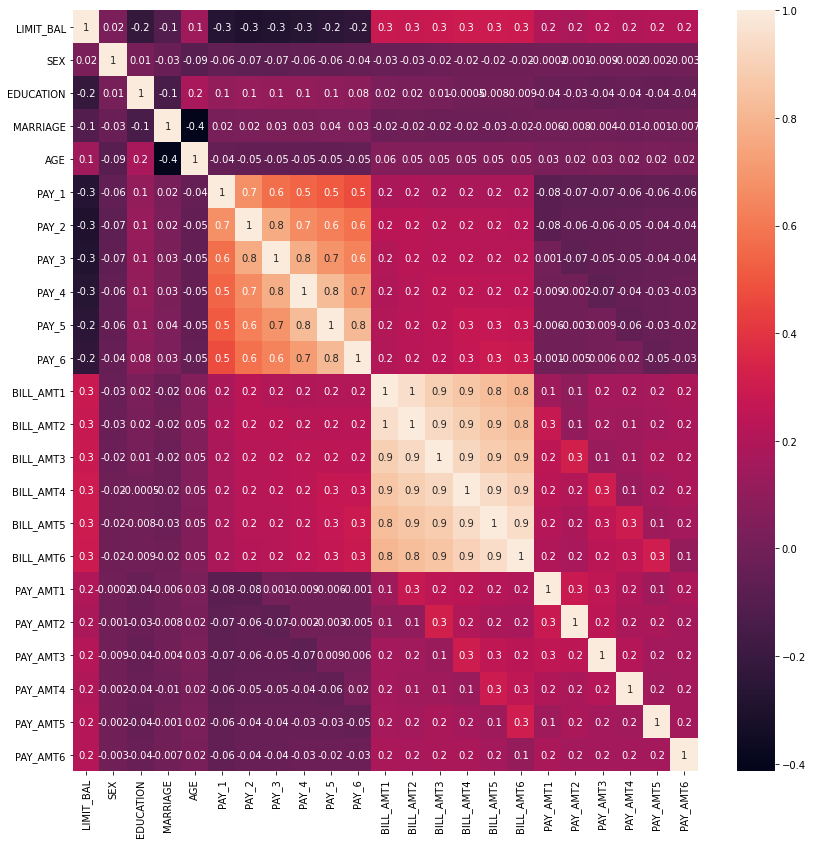

In [43]:
#Lets understand which of the features are highgly correlated, this is to visualize the clusters
y_target = data['def_pay']
x_features = data.drop('def_pay', axis=1)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = x_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

From the Correlation plot it seems PAY_1, BILL_AMT1, PAY_AMT2 are heavily correlated.
Let us plot a scatter to visualize the mentioned features -

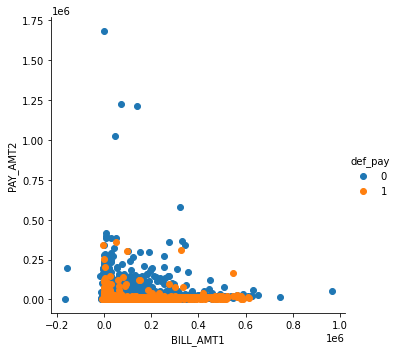

In [53]:
sns1 = sns.FacetGrid(df, hue="def_pay", height=5) \
   .map(plt.scatter, "BILL_AMT1", "PAY_AMT2") \
   .add_legend()

Given that most features do not play a significant role in user defaulting/not defaulting the credit card bill, we drop all those and apply kMeans only on relevant features


In [45]:
required_columns = [ 'PAY_1', 'BILL_AMT1', 'PAY_AMT2', 'def_pay']

data = df[required_columns].copy()
data.sample(5)

X = data.drop('def_pay', axis=1)  
y = data['def_pay']


In [46]:
#Run the KMeans algo now
number_of_clusters = 2
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.train(df=X, verbose=False)

data['cluster'] = kmeans.clusters
centroids = kmeans.centroids
centroids['cluster'] = 'centroid'
all_df = pd.concat([data, centroids])


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


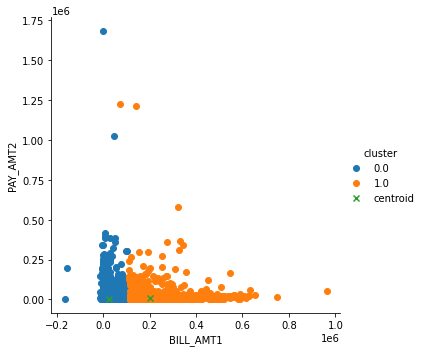

In [52]:
# Plot the cluster centroids
sns.FacetGrid(all_df, hue="cluster", size=5, hue_kws={"marker":["o", "o", "x"]}).map(plt.scatter, "BILL_AMT1", "PAY_AMT2").add_legend()


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


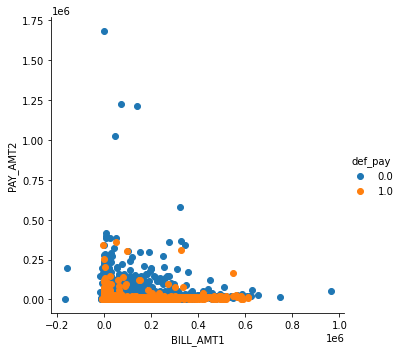

In [49]:
# Plot the clusters
sns.FacetGrid(all_df, hue="def_pay", size=5).map(plt.scatter, "BILL_AMT1", "PAY_AMT2").add_legend()

Inference: <<TODO>>